### Prepare rules for the all the data sets 
1. Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2. Change the minimum length in apriori algorithm
3. Visualize the obtained rules using different plots 


# Book Dataset

# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("book.csv")
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# Data Understanding

In [4]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
# creating total of each item bought
new_df=df.sum()
new_df

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [7]:
new_df.count()

11

In [8]:
new_df.duplicated().sum()

0

In [9]:
new_df.shape

(11,)

<AxesSubplot:>

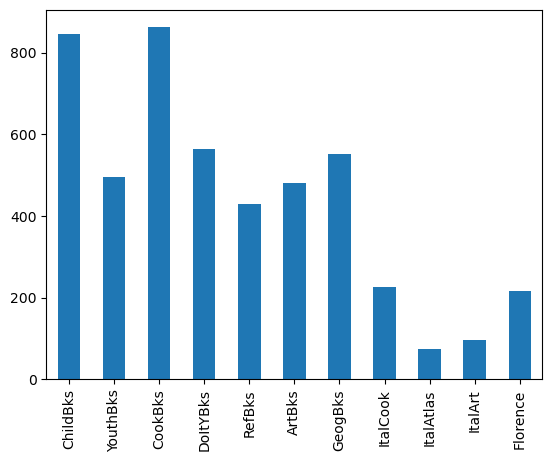

In [10]:
new_df.plot.bar()

The top three books bought by customers according to transaction record are: ChildBks, CookBks,GeogBks

### 1. Apriori algorithm with iterating support values and keeping min confidence=0.5

In [11]:
min_support=[]
len_rules=[]
itemset=[]
i=0

for s in np.arange(0.01,0.420,0.010):
    frequent_item = apriori(df, min_support=s, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=0.5)
    item_length=len(frequent_item)
    rule_length=len(rules)
    min_support.append(s)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 41


In [12]:
d={'Minimum support':min_support,'Frequent itemsets':itemset,'Association rules number':len_rules}
sup_rules=pd.DataFrame(d)
sup_rules.head()

,Minimum support,Frequent itemsets,Association rules number
0,0.01,594,3272
1,0.02,276,1004
2,0.03,181,558
3,0.04,133,372
4,0.05,100,260


<AxesSubplot:xlabel='Minimum support', ylabel='Association rules number'>

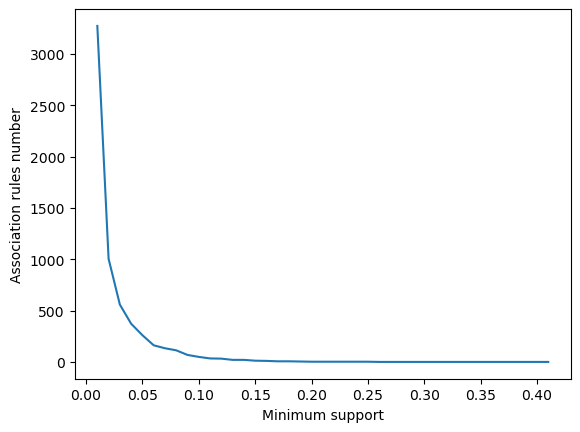

In [13]:
import seaborn as sns
sns.lineplot(data=sup_rules, x="Minimum support", y="Association rules number")

The above plot shows that as minimum support value increases the number of association rules formed decreases.This is because with increase in support value,the number of frequent item sets generated decreases.Less number of frequent sets means less number of rules formed.

### 2. Apriori algorithm with iterating confidence values and min support =0.01

In [14]:
min_conf=[]
len_rules=[]
itemset=[]
i=0

for t in np.arange(0.1,1.025,0.025):
    frequent_item = apriori(df, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=t)
    item_length=len(frequent_item)
    rule_length=len(rules)
    min_conf.append(t)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 37


In [15]:
c={'Minimum confidence':min_conf,'Frequent itemsets':itemset,'Association rules number':len_rules}
conf_rules=pd.DataFrame(c)
conf_rules.head()

,Minimum confidence,Frequent itemsets,Association rules number
0,0.100,594,9079
1,0.125,594,8420
2,0.150,594,7926
3,0.175,594,7528
4,0.200,594,7163


<AxesSubplot:xlabel='Minimum confidence', ylabel='Association rules number'>

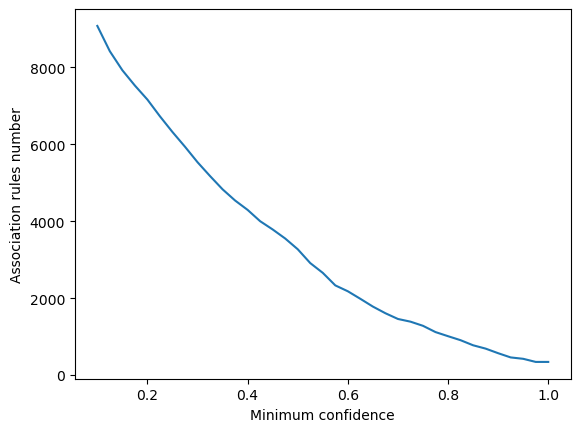

In [16]:
import seaborn as sns
sns.lineplot(data=conf_rules, x="Minimum confidence", y="Association rules number")

The graph shows that as threshold of confidence is increased,the number of association rules get decreased.This is because with higher thresholds, fewer frequent itemsets are generated as few qualify for increased threshold values.

## Changing Min Length In Apriori Algorithm And Observing The Changes In Association Rules.
Here min support is considered as 0.01 and min confidence as 0.5

In [17]:
k_itemset=[]
len_rules=[]
itemset=[]
i=0

for l in range(1,100):
    frequent_item = apriori(df, max_len=l,min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=0.5)
    item_length=len(frequent_item)
    rule_length=len(rules)
    k_itemset.append(l)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 99


In [18]:
a={'Length_itemset':k_itemset,'Frequent itemsets':itemset,'Association rules number':len_rules}
itemset_rules=pd.DataFrame(a)
itemset_rules.head()

,Length_itemset,Frequent itemsets,Association rules number
0,1,11,0
1,2,65,32
2,3,208,317
3,4,408,1167
4,5,547,2366


(0.0, 3435.6)

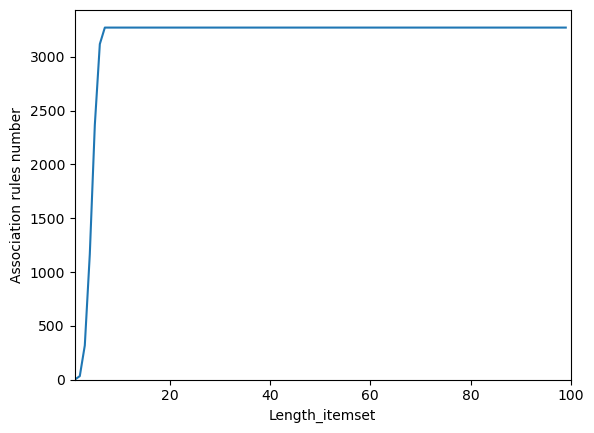

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=itemset_rules, x="Length_itemset", y="Association rules number")
plt.xlim(1,100)
plt.ylim(0,)

The graph shows that with increase in length of itemsets till 10, the number of association rules keep on increasing. Beyond length 10,the number of rules become constant. 

### Association Rules Generation By Running Apriori With Min Support=0.01 And Min Confidence=0.5

# Generating Frequent Itemset


In [20]:
frequent_itemsets= apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [21]:
print("Number of frequent itemsets generated with min support 0.01 is:",(frequent_itemsets.shape[0]))

Number of frequent itemsets generated with min support 0.01 is: 594


# Adding a Length Column Which Stores The Length Of Item Sets Generated


In [22]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [23]:
frequent_itemsets.head()

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1


# Checking The Number Of Frequent Itemsets Generated For Each Length


In [24]:
frequent_itemsets['length'].value_counts()

4    200
3    143
5    139
2     54
6     43
1     11
7      4
Name: length, dtype: int64

The maximum number of frequent itemsets generated are of length 4.

In [25]:
rules = association_rules(frequent_itemsets,metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
2174,"(ItalCook, ItalArt, ItalAtlas)","(RefBks, CookBks, ChildBks, ArtBks)",0.0125,0.0610,0.0110,0.880000,14.426230,0.010238,7.825000
2175,"(ChildBks, ArtBks, ItalAtlas)","(RefBks, CookBks, ItalCook, ItalArt)",0.0155,0.0160,0.0110,0.709677,44.354839,0.010752,3.389333
2176,"(ArtBks, ItalCook, ItalAtlas)","(RefBks, CookBks, ChildBks, ItalArt)",0.0130,0.0150,0.0110,0.846154,56.410256,0.010805,6.402500
2177,"(ItalArt, ItalAtlas)","(RefBks, CookBks, ChildBks, ArtBks, ItalCook)",0.0165,0.0220,0.0110,0.666667,30.303030,0.010637,2.934000


# Checking Statistical Summary Of Rules Generated


In [26]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000
mean,0.027498,0.223341,0.021013,0.794653,7.432924,0.013714,inf
std,0.028906,0.142198,0.020536,0.131975,9.120928,0.009386,NaN
min,0.010000,0.011500,0.010000,0.600000,1.404179,0.004155,1.441240
25%,0.014500,0.113500,0.011500,0.666667,2.314815,0.008640,2.489375
50%,0.018000,0.214500,0.014500,0.781250,4.149378,0.010752,3.519700
75%,0.028500,0.423000,0.021000,0.904879,7.672540,0.014866,7.440000
max,0.423000,0.431000,0.256000,1.000000,58.275058,0.078252,inf


In [27]:
print("Total number of association rules generated:",(rules.shape[0]))

Total number of association rules generated: 2179


## Visualization of Association Rules 

## 1. Using Scatter Plot

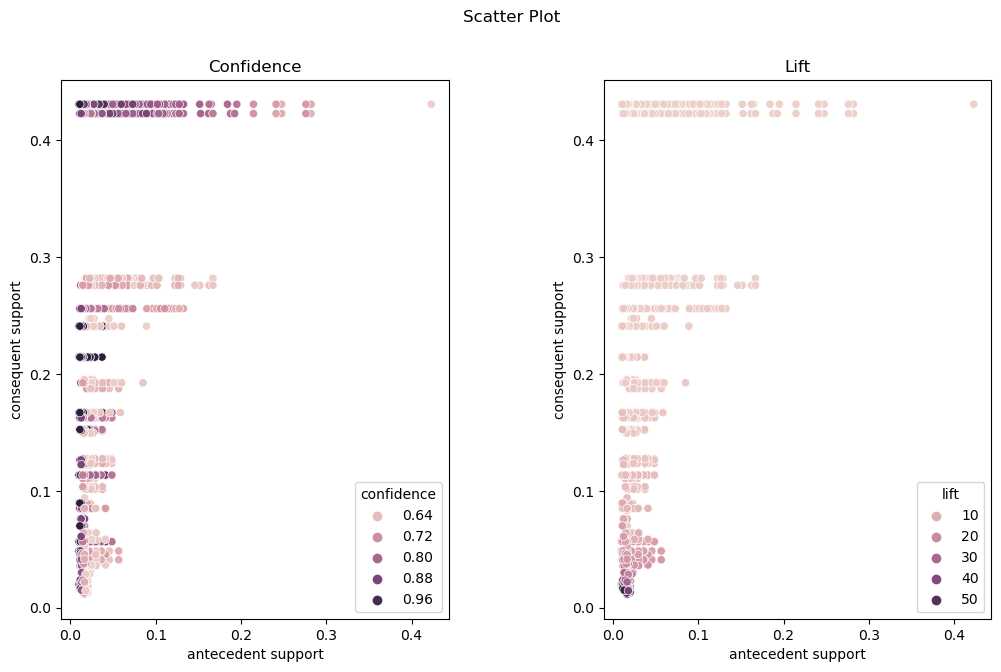

In [28]:
fig, axes = plt.subplots(1,2, figsize=(12,7))
fig.suptitle('Scatter Plot')

sns.scatterplot(ax=axes[0],x='antecedent support',y='consequent support',hue='confidence',data=rules)
axes[0].set_title('Confidence')

sns.scatterplot(ax=axes[1],x='antecedent support',y='consequent support',hue='lift',data=rules)
axes[1].set_title('Lift')

plt.subplots_adjust(wspace=0.4)
plt.show()

+ The first subplot shows relationship of antecedent and consequent support with confidence which is shown in color gradient.Deep colors indicate high confidence and light colors indicate low confidence.We can see that dark points are concentrated near lower values of x axis.This means high confidence is observed for lower antecedent support values.


+ The second subplot shows  relationship of lift with antecedent and consequent support.Dark color indicates highest lift values.The plot shows taht maximum rules have lift values in range 10-30. Higher values around 40-50 is almost minimal and that too found for very low antecedent and consequent support.

## 2. Heatmap

To generate heatmap,a subset of first ten rules will be considered to avoid overcrowding of map and enhance clarity of map.

In [29]:
rules_map=rules.copy()

# Selecting Rules With High Confidence,Lift and Support


In [30]:
rules_map=rules_map.loc[(rules_map['lift']>10)& (rules_map['confidence']>0.70)& (rules_map['support']>0.02)]

In [31]:
rules_map.reset_index(drop=True,inplace=True)

# Creating a Subset Of First 10 Rules Which Will Be Plotted With Heatmap


In [32]:
rules_10=rules_map.iloc[0:10,:]
rules_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalArt),"(ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
1,"(ChildBks, ItalArt)","(ArtBks, ItalCook)",0.0360,0.0565,0.0285,0.791667,14.011799,0.026466,4.528800
2,"(CookBks, ItalAtlas)","(RefBks, ItalCook)",0.0285,0.0465,0.0230,0.807018,17.355216,0.021675,4.940864
3,"(CookBks, ItalArt)","(ArtBks, ItalCook)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429
4,(ItalArt),"(ArtBks, CookBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
5,"(DoItYBks, ItalArt)","(ArtBks, ItalCook)",0.0300,0.0565,0.0250,0.833333,14.749263,0.023305,5.661000
6,"(ItalArt, GeogBks)","(ArtBks, ItalCook)",0.0295,0.0565,0.0240,0.813559,14.399280,0.022333,5.060591
7,"(ChildBks, CookBks, ItalArt)","(ArtBks, ItalCook)",0.0300,0.0565,0.0285,0.950000,16.814159,0.026805,18.870000
8,"(ChildBks, ItalArt)","(ArtBks, CookBks, ItalCook)",0.0360,0.0565,0.0285,0.791667,14.011799,0.026466,4.528800
9,"(CookBks, DoItYBks, ItalArt)","(ArtBks, ItalCook)",0.0270,0.0565,0.0250,0.925926,16.388069,0.023475,12.737250


# Converting Antecedents And Consequents To Strings


In [33]:
rules_10['antecedents']=rules_10['antecedents'].apply(lambda a: ','.join(list(a)))
rules_10['consequents']=rules_10['consequents'].apply(lambda a: ','.join(list(a)))

In [34]:
print(rules_10[['antecedents','consequents']])

                antecedents              consequents
0                   ItalArt          ArtBks,ItalCook
1          ChildBks,ItalArt          ArtBks,ItalCook
2         CookBks,ItalAtlas          RefBks,ItalCook
3           CookBks,ItalArt          ArtBks,ItalCook
4                   ItalArt  ArtBks,CookBks,ItalCook
5          DoItYBks,ItalArt          ArtBks,ItalCook
6           ItalArt,GeogBks          ArtBks,ItalCook
7  ChildBks,CookBks,ItalArt          ArtBks,ItalCook
8          ChildBks,ItalArt  ArtBks,CookBks,ItalCook
9  CookBks,DoItYBks,ItalArt          ArtBks,ItalCook


# Constructing  Pivot Table


In [35]:
pvt_table1=rules_10.pivot(index='antecedents',columns='consequents',values='support')
pvt_table2=rules_10.pivot(index='antecedents',columns='consequents',values='confidence')
pvt_table3=rules_10.pivot(index='antecedents',columns='consequents',values='lift')

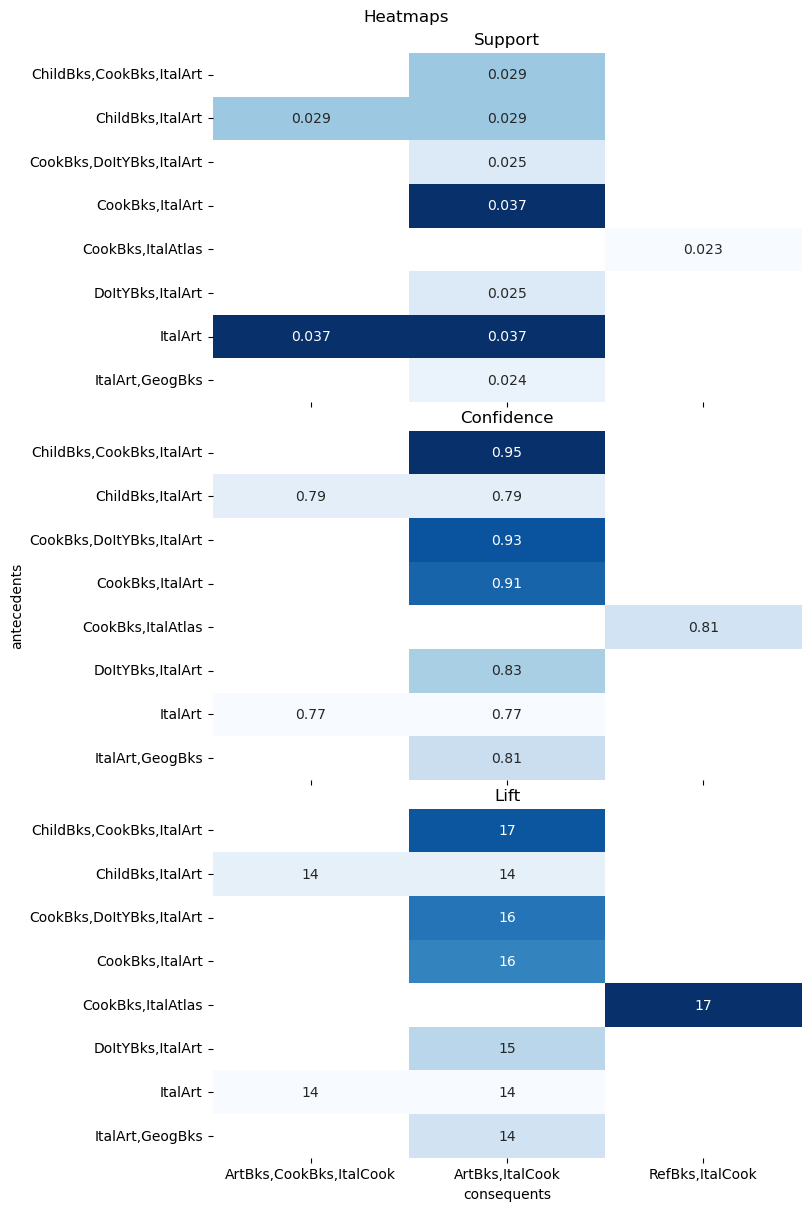

In [36]:
fig, axes = plt.subplots(3,1,sharex=True,constrained_layout = True,figsize=(8,12))
fig.suptitle('Heatmaps')

sns.heatmap(ax=axes[0],data=pvt_table1,annot=True,cbar=False,cmap='Blues')
axes[0].set_title('Support')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)

sns.heatmap(ax=axes[1],data=pvt_table2,annot=True,cbar=False,cmap='Blues')
axes[1].set_title('Confidence')
axes[1].set(xlabel=None)

sns.heatmap(ax=axes[2],data=pvt_table3,annot=True,cbar=False,cmap='Blues')
axes[2].set_title('Lift')
axes[2].set(ylabel=None)


plt.show()

+ Darker cells imply higher support/confidence/lift values. The blank/white cells imply that no association rule was formed for those antecedent-->sconsequent pairs.
+ The first subplot shows correlation with support values. The highest support is 0.037 for (ItalArt,CookBks)-->(ItalCook,ArtBks).
+ The second subplot shows that consequent(ItalCook,ArtBks) have high confidence for all its antecedents except (CookBks,ItalAtlas) for which no rule was formed.
+ In third subplot, it can be seen (ItalCook,ArtBks) have high lift values for all its antecedents except one.
+ It can be said that (ItalCook,ArtBks) is a very significant consequent i.e these two items have a high change of getting purchased by customers if their antecedents are purchased.

# Movie Dataset

In [37]:
df = pd.read_csv("my_movies.csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# EDA

In [38]:
df.shape

(10, 15)

In [39]:
df.drop(['V1','V2','V3','V4','V5'],axis=1,inplace=True)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Creating Total Of Each Movie Bought


In [40]:
s=df.sum()
s

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

<AxesSubplot:>

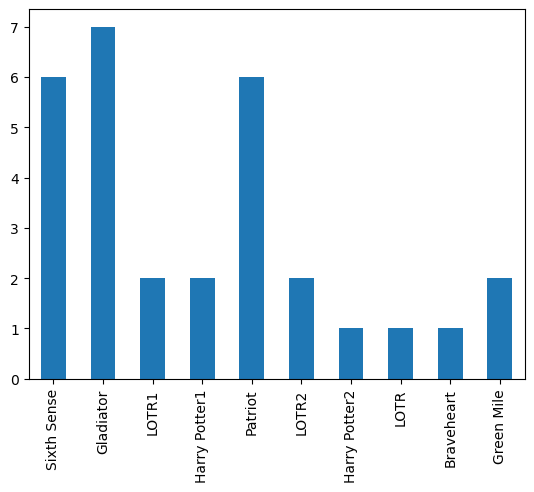

In [41]:
s.plot.bar()

### 1. Apriori algorithm with iterating support values and min keeping confidence=0.5

In [42]:
min_support=[]
len_rules=[]
itemset=[]
i=0

for s in np.arange(0.01,0.420,0.010):
    frequent_item = apriori(df, min_support=s, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=0.5)
    item_length=len(frequent_item)
    rule_length=len(rules)
    min_support.append(s)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 41


In [43]:
d={'Minimum support':min_support,'Frequent itemsets':itemset,'Association rules number':len_rules}
sup_rules=pd.DataFrame(d)
sup_rules.head()

,Minimum support,Frequent itemsets,Association rules number
0,0.01,53,216
1,0.02,53,216
2,0.03,53,216
3,0.04,53,216
4,0.05,53,216


(0.0, 226.6)

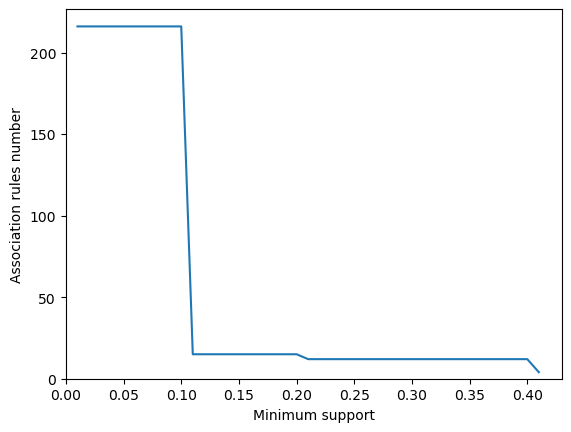

In [44]:
sns.lineplot(data=sup_rules, x="Minimum support", y="Association rules number")
plt.xlim(0,)
plt.ylim(0,)

### 2. Apriori algorithm with iterating confidence values and min support =0.01

In [45]:
min_conf=[]
len_rules=[]
itemset=[]
i=0

for t in np.arange(0.1,1.025,0.025):
    frequent_item = apriori(df, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=t)
    item_length=len(frequent_item)
    rule_length=len(rules)
    min_conf.append(t)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 37


In [46]:
c={'Minimum confidence':min_conf,'Frequent itemsets':itemset,'Association rules number':len_rules}
conf_rules=pd.DataFrame(c)
conf_rules.head()

,Minimum confidence,Frequent itemsets,Association rules number
0,0.100,53,250
1,0.125,53,250
2,0.150,53,242
3,0.175,53,220
4,0.200,53,220


<AxesSubplot:xlabel='Minimum confidence', ylabel='Association rules number'>

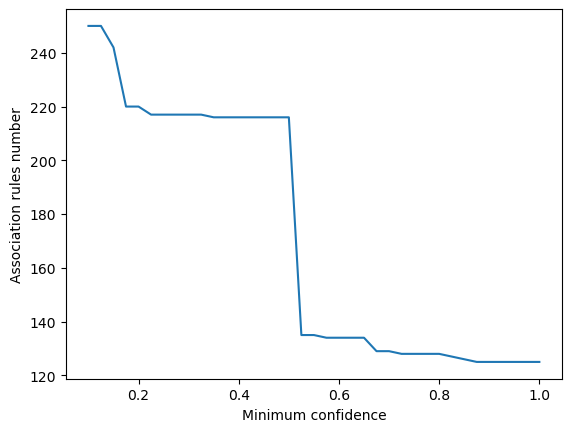

In [47]:
sns.lineplot(data=conf_rules, x="Minimum confidence", y="Association rules number")

As minimum confidence value is increased,number of association rules keep on gradually decreasing.Above min confidence=0.4,there is steep decrease in number of association rules.This shows that as threshold of confidence increases,fewer frequent itemsets are generated and fewer rules are formed.

## Changing min length in apriori algorithm and observing the changes in number of association rules formed

Here min support is considered as 0.01 and min confidence as 0.5

In [48]:
k_itemset=[]
len_rules=[]
itemset=[]
i=0

for l in range(1,60):
    frequent_item = apriori(df, max_len=l,min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=0.5)
    item_length=len(frequent_item)
    rule_length=len(rules)
    k_itemset.append(l)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 59


In [49]:
a={'Length_itemset':k_itemset,'Frequent itemsets':itemset,'Association rules number':len_rules}
itemset_rules=pd.DataFrame(a)
itemset_rules.head()

,Length_itemset,Frequent itemsets,Association rules number
0,1,10,0
1,2,30,31
2,3,46,110
3,4,52,187
4,5,53,216


(0.0, 226.8)

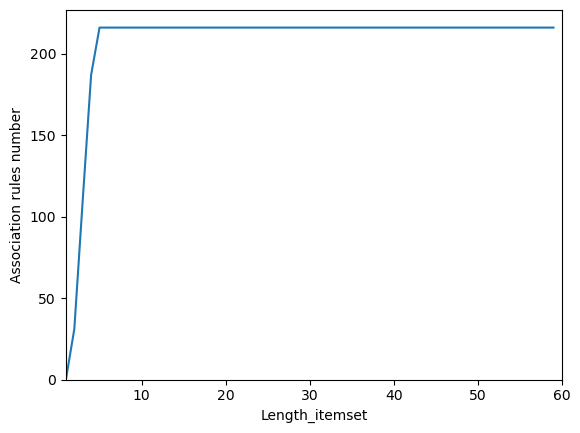

In [50]:
sns.lineplot(data=itemset_rules, x="Length_itemset", y="Association rules number")
plt.xlim(1,60)
plt.ylim(0,)

Number of association rules formed keep on increasing with increasing length of item sets and becomes at length~5 and beyond.

### Association rules generation by running Apriori with min support=0.01 and min confidence=0.5

In [51]:
# generating frequent itemset
frequent_itemsets= apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [52]:
print("Number of frequent itemsets generated with min support=0.1 is:",(frequent_itemsets.shape[0]))

Number of frequent itemsets generated with min support=0.1 is: 53


# Adding a Length Column Which Stores The length Of Item Sets Generated


In [53]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [54]:
frequent_itemsets.head()

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1


# Checking The Number Of Frequent Itemsets Generated For Each Length


In [55]:
frequent_itemsets['length'].value_counts()

2    20
3    16
1    10
4     6
5     1
Name: length, dtype: int64

In [56]:
rules = association_rules(frequent_itemsets,metric="confidence", min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


# Checking Statistical Summary Of Rules Generated


In [57]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.0
mean,0.166667,0.243981,0.120833,0.799118,4.954659,0.073056,inf
std,0.117335,0.198508,0.082863,0.240568,2.879200,0.027835,NaN
min,0.100000,0.100000,0.100000,0.500000,0.714286,-0.040000,0.6
25%,0.100000,0.100000,0.100000,0.500000,2.500000,0.060000,1.8
50%,0.100000,0.200000,0.100000,1.000000,5.000000,0.080000,NaN
75%,0.200000,0.200000,0.100000,1.000000,5.000000,0.080000,NaN
max,0.700000,0.700000,0.600000,1.000000,10.000000,0.180000,inf


In [58]:
print("Total number of association rules generated with min support=0.01 and min confidence=0.5 is:",(rules.shape[0]))

Total number of association rules generated with min support=0.01 and min confidence=0.5 is: 216


## Visualization of Association rules

## 1.Scatter Plot

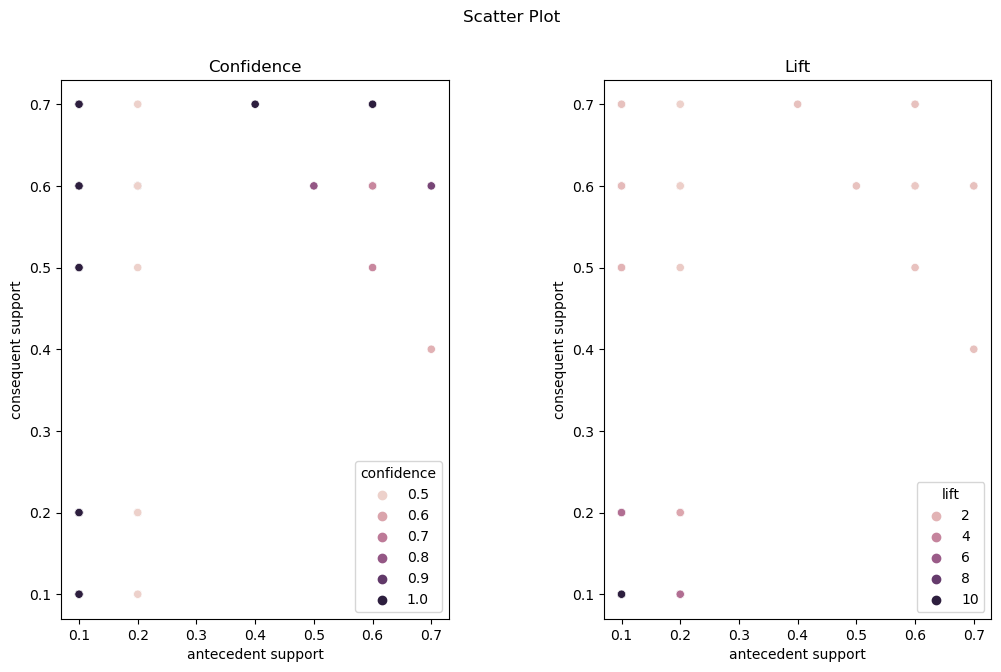

In [59]:
fig, axes = plt.subplots(1,2, figsize=(12,7))
fig.suptitle('Scatter Plot')

sns.scatterplot(ax=axes[0],x='antecedent support',y='consequent support',hue='confidence',data=rules)
axes[0].set_title('Confidence')

sns.scatterplot(ax=axes[1],x='antecedent support',y='consequent support',hue='lift',data=rules)
axes[1].set_title('Lift')

plt.subplots_adjust(wspace=0.4)
plt.show()

+ The first subplot shows relationship of antecedent and consequent support with confidence which is shown in color gradient.Deep colors indicate high confidence and light colors indicate low confidence.We can see that dark points are concentrated near lower values of x axis.This means high confidence is observed for lower antecedent support values.


+ The second subplot shows  relationship of lift with antecedent and consequent support.Dark color indicates highest lift values.The plot shows taht maximum rules have lift values in range 2-4. Higher values around 8-10 is almost minimal and that too found for very low antecedent and consequent support.

## 2. Heatmap

To generate heatmap, we will consider a subset of first ten rules else the heatmap table will be too crowded to draw inferences.

In [60]:
rules_map=rules.copy()

# Selecting Rules With High Confidence,Lift And Support


In [61]:
rules_map=rules_map.loc[(rules_map['lift']>9)& (rules_map['confidence']>0.8)& (rules_map['support']>0.05)]

In [62]:
rules_map.reset_index(drop=True,inplace=True)

# Creating a Subset Of First 10 Rules Which Will Be Plotted With Heatmap


In [63]:
rules_10=rules_map.iloc[0:10,:]
rules_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
1,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
2,"(Green Mile, Gladiator, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
3,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
4,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
5,(LOTR),"(Green Mile, Gladiator, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
6,"(LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
7,"(LOTR1, Sixth Sense)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
8,"(LOTR2, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
9,"(LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


# Converting Antecedents And Consequents To Strings


In [64]:
rules_10['antecedents']=rules_10['antecedents'].apply(lambda a: ','.join(list(a)))
rules_10['consequents']=rules_10['consequents'].apply(lambda a: ','.join(list(a)))

In [65]:
print(rules_10[['antecedents','consequents']])

                        antecedents                       consequents
0              Green Mile,Gladiator                              LOTR
1                              LOTR              Green Mile,Gladiator
2  Green Mile,Gladiator,Sixth Sense                              LOTR
3                  LOTR,Sixth Sense              Green Mile,Gladiator
4              Green Mile,Gladiator                  LOTR,Sixth Sense
5                              LOTR  Green Mile,Gladiator,Sixth Sense
6               LOTR1,Harry Potter1                 LOTR2,Sixth Sense
7                 LOTR1,Sixth Sense               LOTR2,Harry Potter1
8               LOTR2,Harry Potter1                 LOTR1,Sixth Sense
9                 LOTR2,Sixth Sense               LOTR1,Harry Potter1


# Constructing  Pivot Table


In [66]:
pvt_table1=rules_10.pivot(index='antecedents',columns='consequents',values='support')
pvt_table2=rules_10.pivot(index='antecedents',columns='consequents',values='confidence')
pvt_table3=rules_10.pivot(index='antecedents',columns='consequents',values='lift')

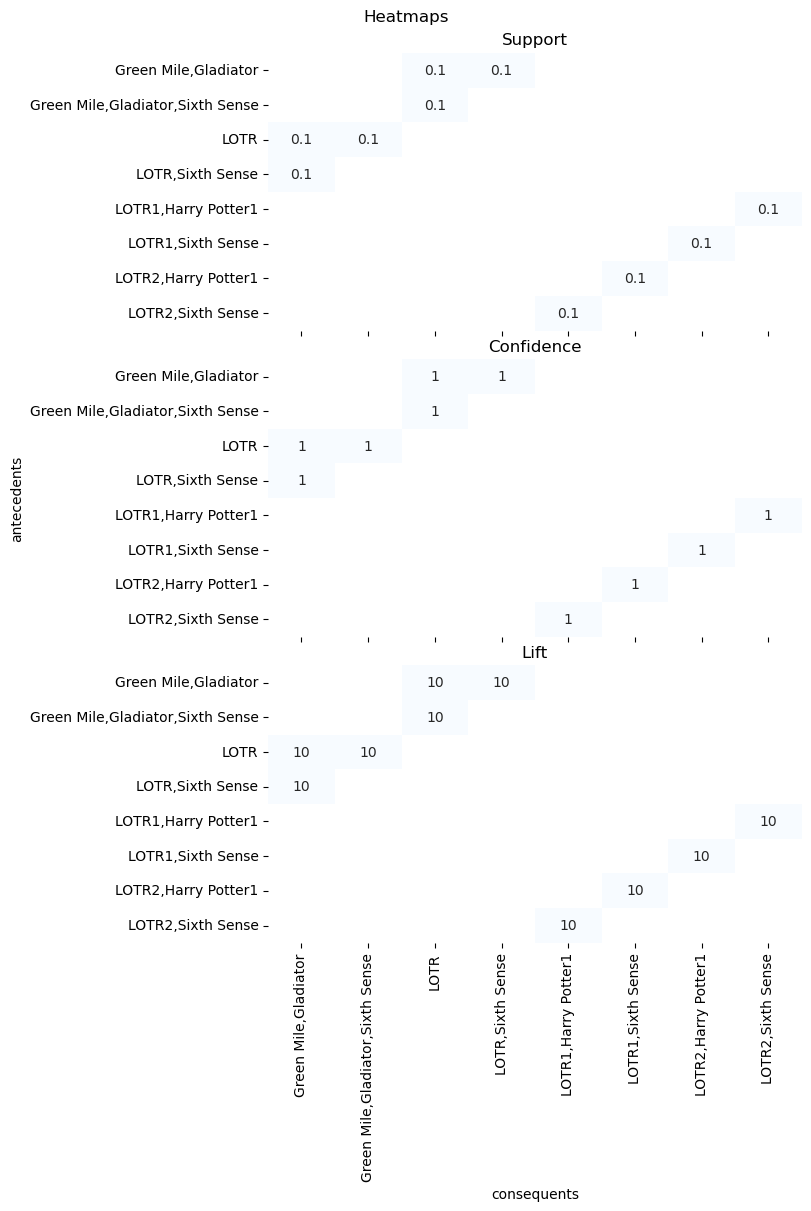

In [67]:
fig, axes = plt.subplots(3,1,sharex=True,constrained_layout = True,figsize=(8,12))
fig.suptitle('Heatmaps')

sns.heatmap(ax=axes[0],data=pvt_table1,annot=True,cbar=False,cmap='Blues')
axes[0].set_title('Support')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)

sns.heatmap(ax=axes[1],data=pvt_table2,annot=True,cbar=False,cmap='Blues')
axes[1].set_title('Confidence')
axes[1].set(xlabel=None)

sns.heatmap(ax=axes[2],data=pvt_table3,annot=True,cbar=False,cmap='Blues')
axes[2].set_title('Lift')
axes[2].set(ylabel=None)


plt.show()